<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/mini_labs/week_7_fisherlds.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BYU CS 473 — Fisher’s Linear Discriminant Analysis (FLDA)

In this assignment, you will learn about **Fisher’s Linear Discriminant Analysis** (FLDA), a supervised dimensionality reduction technique.  

You will compare FLDA to PCA, derive the optimal 1D projection, and extend the idea to higher dimensions and multiple classes.

---

## Learning Goals
- Understand the difference between PCA and FLDA  
- Visualize PCA vs FLDA projection directions  
- Derive the optimal 1D Fisher discriminant  
- Extend FLDA to higher dimensions and multiple classes  


## 1. What is Fisher’s Linear Discriminant?

- **PCA**: finds directions of maximum variance (unsupervised).  
- **FLDA**: finds directions that best separate labeled classes (supervised).  

**Key idea:**  
FLDA maximizes the **between-class variance** while minimizing the **within-class variance**.


### Exercise 1
In your own words, explain the difference between PCA and FLDA.  
When would FLDA be more useful than PCA?


PCA is unsupervised dimensionality reduction technique to find an directions of the data's maximun variation and spread. where as FLDA is supervised technique which uses class labels to find the  directions that maximize the separation between different classes and minimize the spread between classes.

FLDA is more useful than PCA in a classification context, where you need to find a best match between 2-4 groups for building a model.

## 2. Example: PCA vs FLDA

We will simulate 2D data with two classes, and compare:
1. PCA direction  
2. FLDA direction  
3. Projection onto PCA direction  
4. Projection onto FLDA direction


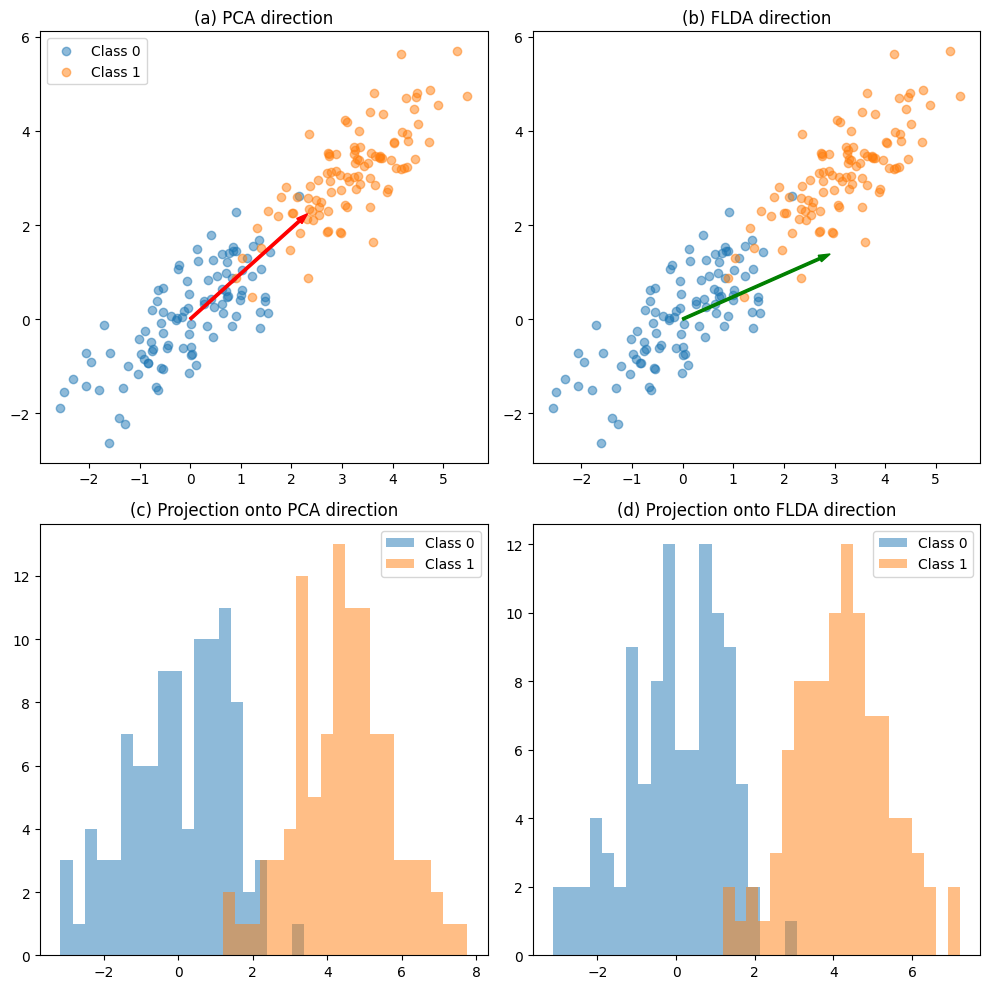

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data
np.random.seed(0)
mean1, cov1 = [0,0], [[1,0.75],[0.75,1]]
mean2, cov2 = [3,3], [[1,0.75],[0.75,1]]

X1 = np.random.multivariate_normal(mean1, cov1, 100)
X2 = np.random.multivariate_normal(mean2, cov2, 100)
X = np.vstack((X1, X2))
y = np.array([0]*100 + [1]*100)

# Fit PCA
pca = PCA(n_components=1).fit(X)
pca_dir = pca.components_[0]

# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=1).fit(X, y)
lda_dir = lda.coef_[0] / np.linalg.norm(lda.coef_[0])

# Graphs
fig, axes = plt.subplots(2,2, figsize=(10,10))

# (a) PCA direction
axes[0,0].scatter(X1[:,0], X1[:,1], label="Class 0", alpha=0.5)
axes[0,0].scatter(X2[:,0], X2[:,1], label="Class 1", alpha=0.5)
axes[0,0].arrow(0,0, pca_dir[0]*3, pca_dir[1]*3, color="red", width=0.05)
axes[0,0].set_title("(a) PCA direction")
axes[0,0].legend()

# (b) FLDA direction
axes[0,1].scatter(X1[:,0], X1[:,1], alpha=0.5)
axes[0,1].scatter(X2[:,0], X2[:,1], alpha=0.5)
axes[0,1].arrow(0,0, lda_dir[0]*3, lda_dir[1]*3, color="green", width=0.05)
axes[0,1].set_title("(b) FLDA direction")

# (c) Projection onto PCA direction
proj_pca = X @ pca_dir
axes[1,0].hist(proj_pca[y==0], bins=20, alpha=0.5, label="Class 0")
axes[1,0].hist(proj_pca[y==1], bins=20, alpha=0.5, label="Class 1")
axes[1,0].set_title("(c) Projection onto PCA direction")
axes[1,0].legend()

# (d) Projection onto FLDA direction
proj_lda = X @ lda_dir
axes[1,1].hist(proj_lda[y==0], bins=20, alpha=0.5, label="Class 0")
axes[1,1].hist(proj_lda[y==1], bins=20, alpha=0.5, label="Class 1")
axes[1,1].set_title("(d) Projection onto FLDA direction")
axes[1,1].legend()

plt.tight_layout()
plt.show()


### Exercise 2
- Which projection better separates the two classes?  
- Why does PCA fail to find the best class separation?


The FLDA projection is better separates the two classes because histograms in the FLDA plot have very little overlap. where as PCA has lot more overlap than FLDA.
PCA's primary responce is to find maximum variance which fails to find the difference in class speration no matter what the class labels are.

## 3. Derivation of Optimal 1D Projection

We want a projection vector \(w\) such that the projected means are far apart relative to variance within each class.

- Between-class scatter:
$S_B = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T$

- Within-class scatter:
$S_W = \sum_{i \in C_1}(x_i - \mu_1)(x_i - \mu_1)^T + \sum_{i \in C_2}(x_i - \mu_2)(x_i - \mu_2)^T$

Optimization problem:
$w^* = \arg \max_w \frac{w^T S_B w}{w^T S_W w}$

Solution:
$w^* = S_W^{-1}(\mu_1 - \mu_2)$


### Exercise 3 (Optional 5% Extra Credit)
Derive the formula for $w^*$ starting from the optimization problem.  
(Hint: use the Rayleigh quotient and Lagrange multipliers.)


We want to find the vector $w$ that maximizes the Fisher criterion $J(w)$:
$$ J(w) = \frac{w^TS_{B}w}{w^TS_{W}w}  $$
To find the maximum, we can take the derivative of $J(w)$ with respect to $w$ and set it to zero
$$ \frac{dJ(w)}{dw} =
\frac{(2S_B w)(w^T S_W w) - (w^T S_B w)(2S_W w)}{(w^T S_W w)^2} = 0  $$
Rearrange the equation.
$$ (S_B w)(w^T S_W w) = (w^T S_B w)(S_W w)$$
Recognize the generalized eigenvalue set it to λ.
$$  (S_B w) = \frac{(w^T S_B w)(S_W w)}{(w^T S_W w) }$$
$$  (S_B w) = \frac{(w^T S_B w)}{(w^T S_W w) }(S_W w)$$
$$ \text{Let } λ = \frac{(w^T S_B w)}{(w^T S_W w) } $$
$$ S_B w = λ S_W w$$
$$ S_W^{-1}S_B w = λ S_W w$$
Simplify for the two-class case.
$$ S_B = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T  $$
$$  S_W^{-1} (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T w = \lambda w $$
$$ w \propto S_W^{-1}(\mu_1 - \mu_2) $$
$$ w^* = S_W^{-1}(\mu_1 - \mu_2)$$


## 4. Extension to Higher Dimensions and Multiple Classes

- For **k classes**, FLDA finds at most \(k-1\) discriminant directions.  
- The generalization uses scatter matrices:

$S_B = \sum_{c=1}^k n_c (\mu_c - \mu)(\mu_c - \mu)^T$
$S_W = \sum_{c=1}^k \sum_{x \in c} (x - \mu_c)(x - \mu_c)^T$

- Solve the generalized eigenvalue problem:

$S_W^{-1} S_B w = \lambda w$

- The top eigenvectors form the discriminant subspace.


### Exercise 4
Using scikit-learn’s `LinearDiscriminantAnalysis`, train an FLDA model on the **Iris dataset** (3 classes).  
- Project the data onto 2 FLDA components.  
- Plot the classes in the new space.  
- How well does FLDA separate the classes?


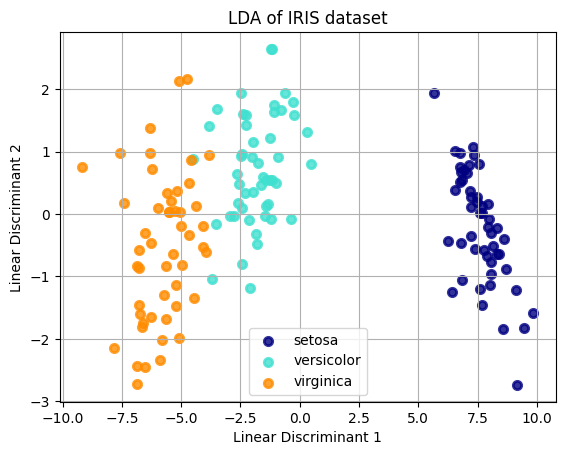

In [3]:
# Your code here
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i,1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.grid(True)
plt.show()

## 5. Reflection

### Exercise 5
Answer in 2–3 sentences each:

1. How does FLDA differ from PCA in its objective?  
2. Why is FLDA limited to at most k−1 dimensions for k classes?  
3. What practical problems might arise when using FLDA?


1. FLDA's objective is to classify the groups and its special for supervised data. it algorithm helps find projection to maximize the distance between class means while minimizing the variance within each class. Where as PCA is an unsupervised algorithm whose objective is to find a projection that captures the maximum variance in the overall dataset.
2. The number of discriminant directions is determined by the rank of the between-class scatter matrix $S_B$ The matrix is created by k vectors which represents class mean differenctiate from overall mean.
3. If your assumptions are wrong, it can deviate the model from predicting perfromance. this happens when $S_{W}$ become singular which is high-dimensional spaces.